<a href="https://colab.research.google.com/github/pashtetttt/tda/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/aimclub/eXplain-NNs &> /dev/null

In [ ]:
! pip install torchmetrics &> /dev/null
! pip install pip install giotto-ph==0.2.2 &> /dev/null
! pip install pip install giotto-tda==0.6.0 &> /dev/null
! pip install umap-learn==0.5.3 &> /dev/null

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import eXNN.topology

In [ ]:
tfm = transforms.ToTensor()
train_ds = MNIST(root='./.cache', train=True, download=True, transform=tfm)
test_ds = MNIST(root='./.cache', train=False, download=False, transform=tfm)
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=36, shuffle=True)
test_dl = torch.utils.data.DataLoader(test_ds, batch_size=36, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 107859988.70it/s]


Extracting ./.cache/MNIST/raw/train-images-idx3-ubyte.gz to ./.cache/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 69698327.86it/s]


Extracting ./.cache/MNIST/raw/train-labels-idx1-ubyte.gz to ./.cache/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 31399190.02it/s]


Extracting ./.cache/MNIST/raw/t10k-images-idx3-ubyte.gz to ./.cache/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3706328.55it/s]

Extracting ./.cache/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./.cache/MNIST/raw



In [ ]:
class SimpleNN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim, leaky_coef=0.1):
        super(SimpleNN, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.LeakyReLU(leaky_coef)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(leaky_coef)
        )
        self.layer3 = nn.Sequential(
            nn.Linear(hidden_dim, output_dim)#,
            #nn.Sigmoid()
        )

    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x

In [ ]:
num_classes = 10
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model = SimpleNN(28*28, num_classes, 64).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

n_epochs = 20
loss_fn = nn.CrossEntropyLoss()
for epoch in list(range(n_epochs)):
    for imgs, lbls in train_dl:
        optimizer.zero_grad()
        out = model(imgs.to(device))
        loss = loss_fn(out, lbls.to(device))
        loss.backward()
        optimizer.step()
    print("Epoch {} loss: {}".format(epoch, loss.item()))

Epoch 0 loss: 0.09214351326227188
Epoch 1 loss: 0.1667184829711914
Epoch 2 loss: 0.09419047087430954
Epoch 3 loss: 0.4755725860595703
Epoch 4 loss: 0.04249119386076927
Epoch 5 loss: 0.015336944721639156
Epoch 6 loss: 0.003473076969385147
Epoch 7 loss: 0.009149531833827496
Epoch 8 loss: 0.13641735911369324
Epoch 9 loss: 0.02000771090388298
Epoch 10 loss: 0.04627572000026703
Epoch 11 loss: 0.009238620288670063
Epoch 12 loss: 0.000711600121576339
Epoch 13 loss: 0.015676921233534813
Epoch 14 loss: 0.0045183091424405575
Epoch 15 loss: 0.0001952003367478028
Epoch 16 loss: 0.001763058826327324
Epoch 17 loss: 0.009892155416309834
Epoch 18 loss: 0.03718740865588188
Epoch 19 loss: 0.00029603272560052574


In [ ]:
model = model.to(torch.device('cpu'))
data = torch.stack([test_ds[i][0] for i in range(100)])
barcodes = eXNN.topology.get_nn_barcodes(model, data, layers = ['layer2', 'layer1'],
                                                 hom_type = "standard", coefs_type = "2")
barcode = barcodes['layer2']

In [ ]:
len(test_ds)

10000

In [ ]:
barcode1 = barcodes['layer1']

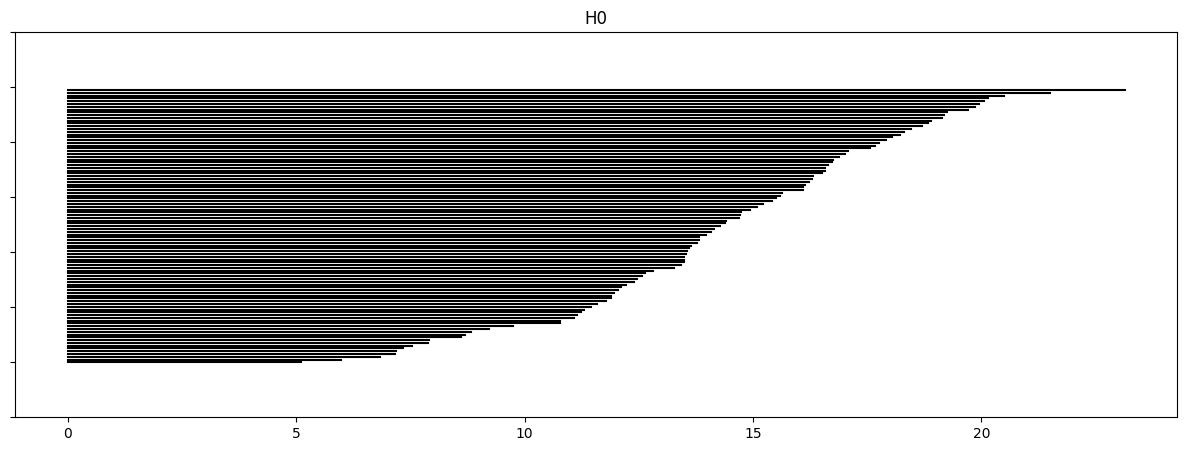

In [ ]:
eXNN.topology.plot_barcode(barcode)

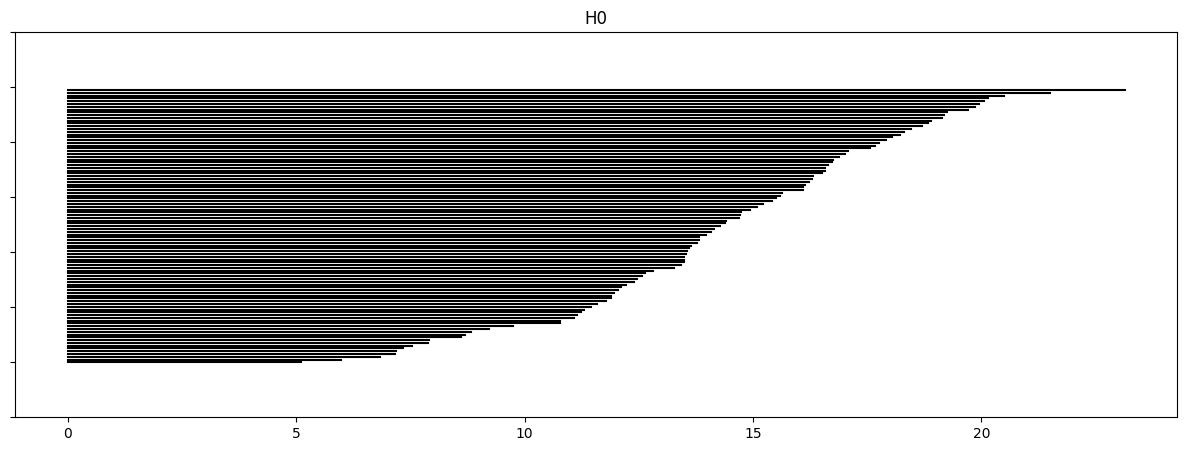

In [ ]:
count = 0
data = torch.stack([test_ds[i][0] for i in range(count*100, count*100 + 100)])
barcodes = eXNN.topology.get_nn_barcodes(model, data, layers = ['layer2', 'layer1'],
                                                hom_type = "standard", coefs_type = "2")
barcode = barcodes['layer2']
eXNN.topology.plot_barcode(barcode)


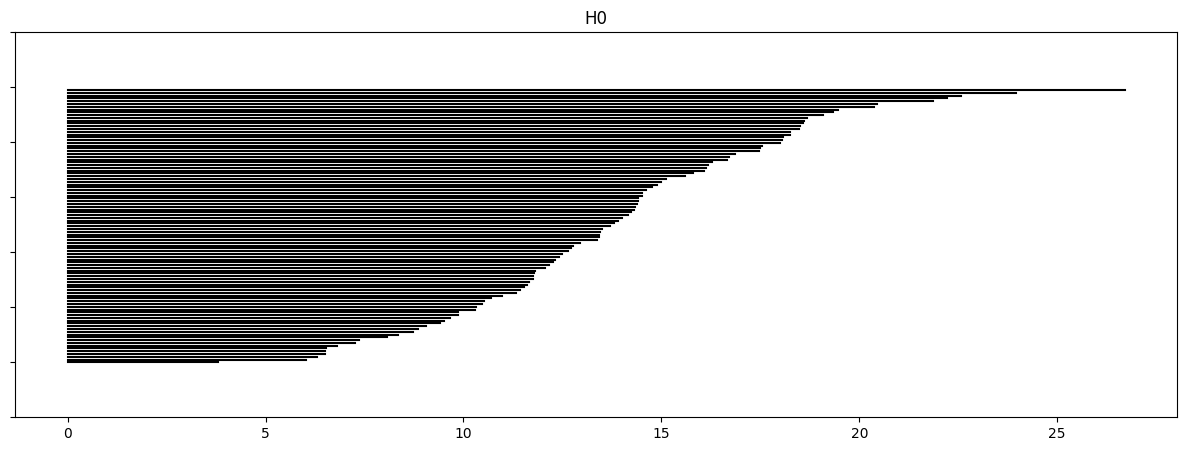

In [ ]:
count = 1
data = torch.stack([test_ds[i][0] for i in range(count*100, count*100 + 100)])
barcodes = eXNN.topology.get_nn_barcodes(model, data, layers = ['layer2', 'layer1'],
                                                hom_type = "standard", coefs_type = "2")
barcode = barcodes['layer2']
eXNN.topology.plot_barcode(barcode)

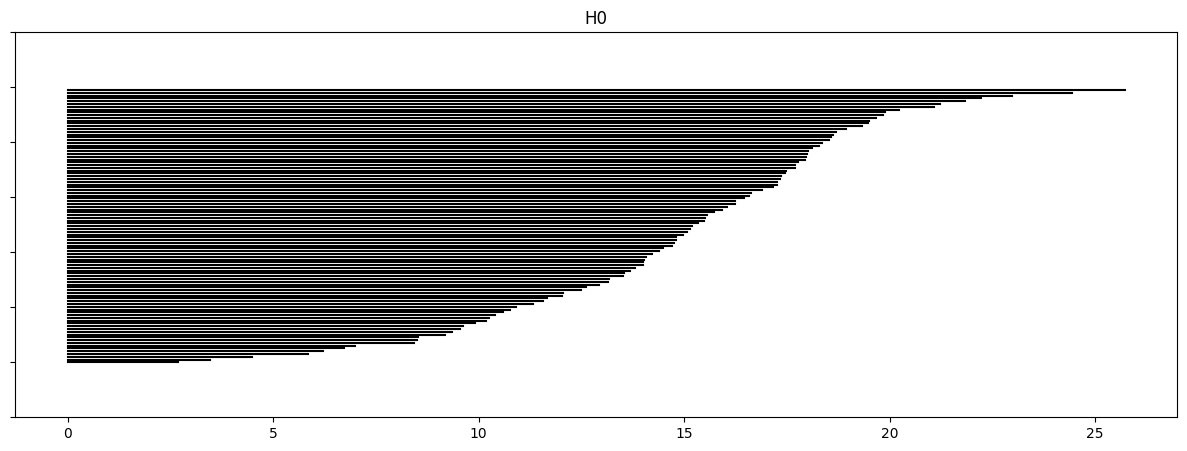

In [ ]:
count = 2
data = torch.stack([test_ds[i][0] for i in range(count*100, count*100 + 100)])
barcodes = eXNN.topology.get_nn_barcodes(model, data, layers = ['layer2', 'layer1'],
                                                hom_type = "standard", coefs_type = "2")
barcode = barcodes['layer2']
eXNN.topology.plot_barcode(barcode)

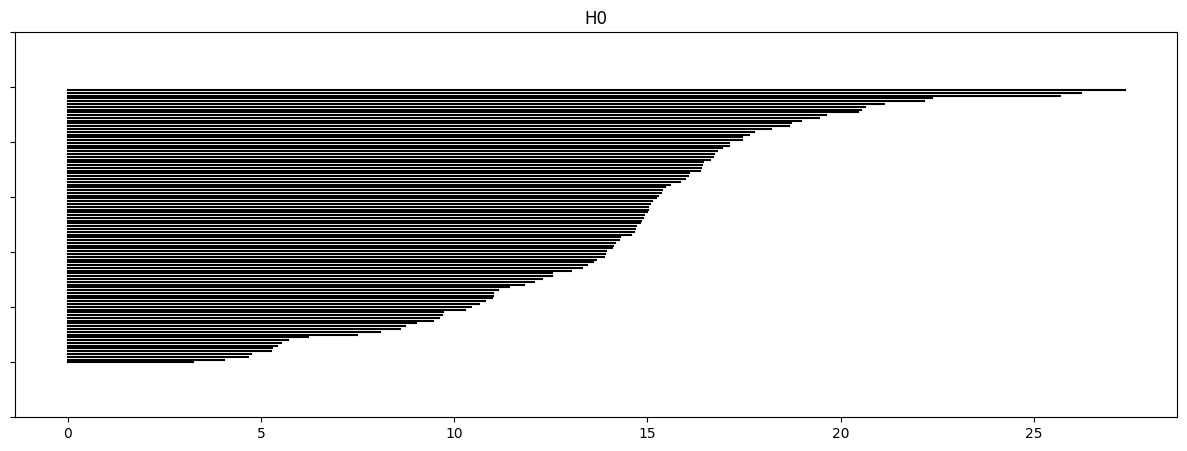

In [ ]:
count = 3
data = torch.stack([test_ds[i][0] for i in range(count*100, count*100 + 100)])
barcodes = eXNN.topology.get_nn_barcodes(model, data, layers = ['layer2', 'layer1'],
                                                hom_type = "standard", coefs_type = "2")
barcode = barcodes['layer2']
eXNN.topology.plot_barcode(barcode)

In [ ]:
eXNN.topology.evaluate_barcode(barcode)

/usr/local/lib/python3.10/dist-packages/eXNN/topology/metrics.py:128: RuntimeWarning:

divide by zero encountered in double_scalars



{'max_length': 23.13222885131836,
 'mean_length': 14.288066897729431,
 'median_length': 14.270315170288086,
 'stdev_length': 3.787001945066584,
 'sum_length': 1414.5186228752136,
 'ratio_2_1': 4.214675928336056,
 'ratio_3_1': 4.018624154032749,
 'h': 4.557923809383491,
 'normh': 0.6282853146713488,
 'snr': inf,
 'mean_birth': 0.0,
 'stdev_birth': 0.0,
 'mean_death': 14.288066897729431,
 'stdev_death': 3.787001945066584}